# Biopython Project

*Project:  Ag & Food DataSchool*  
*Author:  Loretta Clancy*  
*Date:  31-May-2018*


### Project Requirements

* Need to read the output.vcf file, one line at a time,
* Get rid of header information,
* Get the quality score as store the values, and
* Plot them to determine (histogram) - matplotlib, to determine cutoff point 
* Write a function to write out to new file, lines with quality score above specified value

*Notes:*  Can use any packages, including python package to read vcf files

Input File:  "/OSM/CBR/AF_DATASCHOOL/output/2018-05-03_canola/VCF/output.vcf"


### 1. Read the File and looking at the data

Knowing that we are dealing with VCF Data, lets look at what we can expect to get back.

### VCF File formats
A set of calls at a site. Equivalent to a row in a VCF file.  
The standard VCF fields **CHROM**, **POS**, **ID**, **REF**, **ALT**, **QUAL**, **FILTER**, **INFO** and **FORMAT** are available as properties.
The list of genotype calls is in the samples property.

#### Possible values in INFO
Arbitrary keys are permitted, although the following sub-fields are reserved (albeit optional):

* **AA** - ancestral allele 
* **AC** - allele count in genotypes, for each ALT allele, in the same order as listed 
* **AF** - allele frequency for each ALT allele in the same order as listed: use this when estimated from primary data, not called genotypes 
* **AN** - total number of alleles in called genotypes 
* **BQ** - RMS base quality at this position 
* **CIGAR** - cigar string describing how to align an alternate allele to the reference allele 
* **DB** - dbSNP membership 
* **DP** - combined depth across samples, e.g. DP=154 
* **END** - end position of the variant described in this record (for use with symbolic alleles) 
* **H2** - membership in hapmap2 
* **H3** - membership in hapmap3 
* **MQ** - RMS mapping quality, e.g. MQ=52 
* **MQ0** - Number of MAPQ == 0 reads covering this record 
* **NS** - Number of samples with data 
* **SB** - strand bias at this position 
* **SOMATIC** - indicates that the record is a somatic mutation, for cancer genomics 
* **VALIDATED** - validated by follow-up experiment 
* **1000G** - membership in 1000 Genomes 

There is other data in the file, but not sure if we need to access that.

Lets look at reading the first record and see what we can get:

In [39]:
InFile="/OSM/CBR/AF_DATASCHOOL/output/2018-05-03_canola/VCF/output.vcf"

In [59]:
import vcf
print(vcf)

<module 'vcf' from '/apps/python/3.6.1/lib/python3.6/site-packages/vcf/__init__.py'>


In [41]:
counts=0
vcf_reader = vcf.Reader(open(InFile, 'r'))
for record in vcf_reader:
    counts+=1
    print(counts, ": ", record)
    print('CHROM:', record.CHROM)
    print('POS:', record.POS)
    print('ID:', record.ID)
    print('REF:', record.REF)
    print('ALT:', record.ALT)
    print('QUAL:', record.QUAL)
    print('FILTER:', record.FILTER)
    print('INFO:', record.INFO)
    print('FORMAT:', record.FORMAT)
    
    print()
    
    if counts == 2:
        break

1 :  Record(CHROM=NC_027757.2, POS=39084, REF=C, ALT=[A])
CHROM: NC_027757.2
POS: 39084
ID: None
REF: C
ALT: [A]
QUAL: 78.35
FILTER: None
INFO: {'AC': [68], 'AF': [0.944], 'AN': 72, 'DP': 2, 'FS': 0.0, 'MLEAC': [68], 'MLEAF': [0.944], 'MQ': 42.0, 'QD': 25.36, 'SOR': 2.303}
FORMAT: GT:AD:DP:GQ:PL

2 :  Record(CHROM=NC_027757.2, POS=142320, REF=A, ALT=[G])
CHROM: NC_027757.2
POS: 142320
ID: None
REF: A
ALT: [G]
QUAL: 51.35
FILTER: None
INFO: {'AC': [68], 'AF': [0.944], 'AN': 72, 'DP': 2, 'FS': 0.0, 'MLEAC': [68], 'MLEAF': [0.944], 'MQ': 24.0, 'QD': 25.68, 'SOR': 2.303}
FORMAT: GT:AD:DP:GQ:PL



In [56]:
counts=0
vcf_reader = vcf.Reader(open(InFile, 'r'))
for record in vcf_reader:
    counts+=1
    print(counts, ": ", record)
    print('CHROM:', record.CHROM)
    print('POS:', record.POS)
    print('ID:', record.ID)
    print('REF:', record.REF)
    print('ALT:', record.ALT)
    print('QUAL:', record.QUAL)
    print('FILTER:', record.FILTER)
    print('INFO:', record.INFO)
    print('FORMAT:', record.FORMAT)
    #print('samples:', record.samples)
    #print('genotype:', record.genotype)
    
    print('record.num_called:', record.num_called)
    print('record.call_rate:', record.call_rate)
    print('record.num_unknown:', record.num_unknown)
    print('record.num_hom_ref:', record.num_hom_ref)
    print('record.num_het:', record.num_het)
    print('record.num_hom_alt:', record.num_hom_alt)
    print('record.nucl_diversity:', record.nucl_diversity)
    print('record.aaf:', record.aaf)
    print('record.nucl_diversity:', record.nucl_diversity)
    
    #this includes the same data as record.samples, however it is only the sample with values, 
    #print('record.get_hets:', record.get_hets())
    #GT & PL have 72 values, which relates back to the ploidy value that was set when running GATK
    #this information is a <class 'vcf.model.make_calldata_tuple.<locals>.CallData'>
    #want to be able to get the tuple names as well as the data
    hets = record.get_hets()
    for het in hets:
        #print(het)
        print(het.sample)
        het_callData = het.data
        print(het_callData)
        print(type(het_callData))
        for sec in het_callData:
            print(sec)
        #for k, v in het_callData:
        #    print(k, ': ' , v, sep='')
    
    print('record.is_snp:', record.is_snp)
    print('record.is_indel:', record.is_indel)
    print('record.is_transition:', record.is_transition)
    print('record.is_deletion:', record.is_deletion)
    print('record.var_type:', record.var_type)
    print('record.var_subtype:', record.var_subtype)
    print('record.is_monomorphic:', record.is_monomorphic)
    #print('record.genotype():', record.genotype('NA00001')['GT'])
    print()
    
    if counts == 1:
        break

1 :  Record(CHROM=NC_027757.2, POS=39084, REF=C, ALT=[A])
CHROM: NC_027757.2
POS: 39084
ID: None
REF: C
ALT: [A]
QUAL: 78.35
FILTER: None
INFO: {'AC': [68], 'AF': [0.944], 'AN': 72, 'DP': 2, 'FS': 0.0, 'MLEAC': [68], 'MLEAF': [0.944], 'MQ': 42.0, 'QD': 25.36, 'SOR': 2.303}
FORMAT: GT:AD:DP:GQ:PL
record.num_called: 1
record.call_rate: 0.021739130434782608
record.num_unknown: 45
record.num_hom_ref: 0
record.num_het: 1
record.num_hom_alt: 0
record.nucl_diversity: 0.20987654320987664
record.aaf: [0.9444444444444444]
record.nucl_diversity: 0.20987654320987664
16
CallData(GT=0/0/0/0/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1, AD=[0, 2], DP=2, GQ=0, PL=[85, 37, 31, 28, 25, 23, 22, 20, 19, 18, 17, 16, 16, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10, 10, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
<class 

Now lets look at the Quality Scores.  There is a value called QUAL in the data, so lets extract that

In [6]:
quals=[]
vcf_reader = vcf.Reader(open(InFile, 'r'))
for record in vcf_reader:
    #if record.QUAL <= 100:
    quals.append(record.QUAL)
print(quals)

[78.35, 51.35, 71.35, 83.35, 83.35, 77.35, 444.8, 444.8, 293.87, 146.21, 201.8, 127.05, 131.17, 82.35, 81.35, 83.35, 81.35, 50.36, 63.35, 75.35, 171.18, 64, 73.32, 64, 64.32, 83.35, 58.29, 662.7, 1600.25, 1288.19, 1655.02, 2516.7, 83.35, 83.35, 762.56, 66.35, 75.35, 126.09, 55.29, 83.35, 83.35, 80.35, 74.35, 83.35, 83.35, 83.35, 83.35, 83.35, 74.29, 75.35, 74.29, 74.29, 67.35, 75.35, 82.35, 74.29, 74.35, 74.35, 74.35, 82.35, 82.35, 43.6, 75.35, 83.35, 83.35, 74.29, 82.35, 59.29, 77.35, 79.35, 71.35, 67.35, 75.35, 67.35, 83.35, 83.35, 831.88, 2045.16, 60214.11, 32.59, 175981.81, 37.56, 354.53, 39.89, 3929.46, 4371.43]


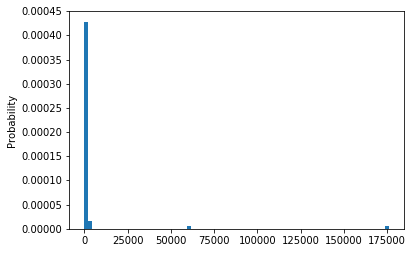

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = quals
plt.hist(x, normed=True, bins=80)
plt.ylabel('Probability');

This graph looks really odd, perhaps I need to have a look at the values I am getting.
On closer inspection of the data, The values are extreem, not at all what I was expecting
***
#### Notes:  Perhaps try and plot as distribution, with log scale 
Not sure where to go here,  perhaps a change of tact.  
***
Lets build a function to extract a specified matrix of values from the specified VCF File, and output this to a new tab delimited file.

*Re-acquainting myself with Python Dictionaries, looking at one of the INFO details*

In [8]:
myDict = {'AC': [68], 'AF': [0.944], 'AN': 72, 'DP': 2, 'FS': 0.0, 'MLEAC': [68], 'MLEAF': [0.944], 'MQ': 60.0, 'QD': 35.92, 'SOR': 2.303}
for k, v in myDict.items():
    print(k, ': ' , v, sep='')

mname = 'DP'
print(myDict[mname])

AC: [68]
AF: [0.944]
AN: 72
DP: 2
FS: 0.0
MLEAC: [68]
MLEAF: [0.944]
MQ: 60.0
QD: 35.92
SOR: 2.303
2


### Now will build a function to extract specified matrix values from the specified VCF File, and output this to a new tab delimited file

In [9]:
def ExtractQualityMatrix(inFile, outFile, paramList):
    
    #extract specified matrix values from the specified VCF File, and output this to a new tab delimited file
    
    #build the header string
    headerStr = ""
    for item in paramList:
        headerStr = headerStr + "\t" + item
    #print(headerStr)
    
    #open the in file for reading
    vcf_reader = vcf.Reader(open(inFile, 'r'))
    
    #open the out file for writing
    with open(outFile, 'w') as fileout:
    
        #print the header details
        fileout.write(headerStr + '\n')
        itemStr=""
        counts=0
        
        for record in vcf_reader:
            counts+=1
            itemStr = str(counts)
            #will probably need to check the INFO Dictionary, so extract it here first
            infoDict = record.INFO

            for item in paramList:
                #print('item:', item)
                if item == "CHROM":
                    itemStr = itemStr + "\t" + str(record.CHROM)
                elif item == "POS":
                    itemStr = itemStr + "\t" + str(record.POS)
                elif item == "ID":
                    itemStr = itemStr + "\t" + str(record.ID)
                elif item == "REF":
                    itemStr = itemStr + "\t" + str(record.REF)
                elif item == "ALT":
                    itemStr = itemStr + "\t" + str(record.ALT)
                elif item == "QUAL":
                    itemStr = itemStr + "\t" + str(record.QUAL)
                elif item == "FILTER":
                    itemStr = itemStr + "\t" + str(record.FILTER)
                elif item == "INFO":
                    itemStr = itemStr + "\t" + str(record.INFO)
                elif item == "FORMAT":
                    itemStr = itemStr + "\t" + str(record.FORMAT)
                else:
                    #need to check the INFO Dictionary
                    try:
                        #print('Dictionary:', infoDict[item])
                        itemStr = itemStr + "\t" + str(infoDict[item])
                    except:
                        itemStr = itemStr + "\t"
                        pass

            #print(itemStr)
            fileout.write(itemStr + '\n')
            itemStr=''

            #if counts==1:
            #    break
    

In [10]:
InFile="/OSM/CBR/AF_DATASCHOOL/output/2018-05-03_canola/VCF/output.vcf"
OutFile="/home/cla473/notebooks/QualityMatrix.csv"
ParamList = ('CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'DP', 'MQ', 'QD')
ExtractQualityMatrix(InFile, OutFile, ParamList)

## TODO:  Need to do some unit testing on the above function ......

Now load in the newly created file and graph it

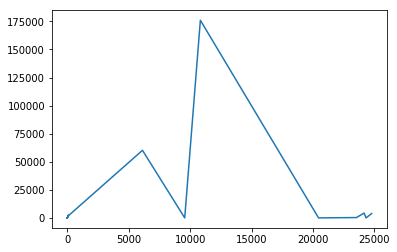

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

InFile="/home/cla473/notebooks/QualityMatrix.csv"
df = pd.read_csv(InFile, delimiter='\t', header=0, usecols=['QUAL', 'DP'])
df_sorted = df.sort_values('DP')
#print(df)

plt.plot(df_sorted['DP'], df_sorted['QUAL'], label="Loaded from file!")
plt.show()

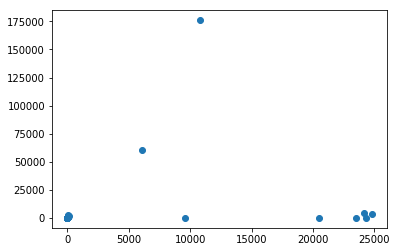

In [28]:
plt.scatter(df_sorted['DP'], df_sorted['QUAL'], label="Loaded from file!")
plt.show()

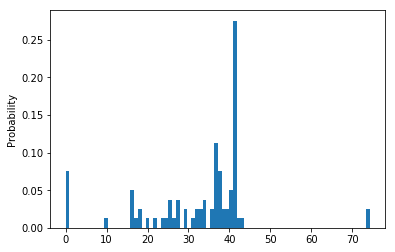

In [29]:
#lets see how this looks
df_sorted['QualByDp'] = df['QUAL'] / df['DP']
#print(df_sorted)

plt.hist(df_sorted['QualByDp'], normed=True, bins=80)
plt.ylabel('Probability');